## Heatmap + Barplot
This is probably the most complicated figure I have made in matplotlib till now. 
A version of this figure is used in my paper "A Cross-Task Analysis of Text Span Representations" - https://arxiv.org/pdf/2006.03866.pdf.
This figure combines a heatmap with 2 barplots that are stacked on the top and right of the heatmap.
The barplot in this figure represent the maximum values in a column or row.  

Let's get started and first import all the relevant stuff.

In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import gridspec

### Set the input-output details and plot text details next

In [2]:
data_file = "../data/subplots_gridspec.csv"
# The data file has a matrix of performance values specified in CSV format
data = pd.read_csv(data_file,header=None)

output_file = "../plots/subplots_gridspec.jpg"

# Plot details
# Span representations
xticklabels = ["AVG", "ATTN", "MAX", "ENDPOINT", "DIFF-SUM", "COHERENT"]
# Pretrained Encoders 
yticklabels = ["BERT-Base", "BERT-Large", "RoBERTa-Base", "RoBERTa-Large", "SpanBERT-Base", "SpanBERT-Large"]

### Plot time!
First we create the subplot grid using gridspec. <br/>
We will be working with a 2 x 2 grid with: <br/>
    (a) barplot on first row, first column <br/>
    (b) nothing on first row, second column <br/>
    (c) heatmap which is the focus of the entire figure on second row, first column <br/>
    (d) another barplot on second row, second column. This one is a horizontal bar plot.

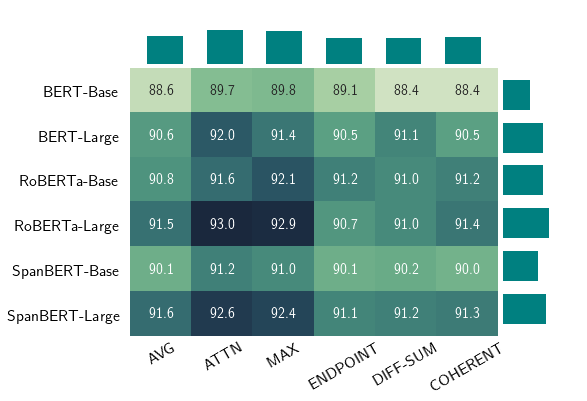

In [3]:
# Change Matplotlib Parameters
plt.rc('text', usetex=True)  # Setting to use latex font; may require installing the TeX fonts
plt.rc('axes', labelcolor='b', edgecolor='k', 
       labelsize=18, titlesize=22)
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] =16
plt.rcParams['ytick.labelsize'] =16


# Grid creation
fig = plt.figure(figsize=(8, 6))
# 2 x 2 grid. We also specify the height and width ratios here. 
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 5], width_ratios=[5, 1]) 
gs.update(wspace=0.025, hspace=0.025)


# Heatmap at (1, 0)
ax = plt.subplot(gs[1, 0])
cmap = sns.cubehelix_palette(light=0.85, as_cmap=True, rot=-.5)  # Lots of colormaps in Seaborn
sns.heatmap(data, cmap=cmap, annot=True, fmt='.1f', cbar=False, 
            xticklabels=xticklabels, yticklabels=yticklabels, ax=ax)
ax.xaxis.set_tick_params(rotation=30)  # Tick labels are big. Rotate them to accomodate them
ax.yaxis.set_tick_params(pad=10)  # Otherwise the annotations are too close 
ax.tick_params(axis='both', length=0)


def initialize_bar_plot(ax):
    """Function to initialize the bar plot."""
    # In this plot we don't show the barplot ticks and bounding box of the plot
    # Remove ticks
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    
    # Remove bounding box
    spines_to_remove = ['left', 'bottom', 'top', 'right']
    for spine in spines_to_remove:
        ax.spines[spine].set_visible(False)


# Bar plot at (0, 0)
ax = plt.subplot(gs[0, 0])
max_vals = data.max(axis=0).values  # Shift the columns to align with the heatmap
initialize_bar_plot(ax)
offset = 0.5 # Shift the bars to align with the heatmap
ax.bar(x=np.arange(offset, len(max_vals) + offset, 1),  
       height=max_vals, width=0.6, color='teal')
# Limit the y-axis to highlight the difference in the performance values
ax.set_ylim([85, 98])


# Horizontal bar plot at (1, 1)
max_vals = data.max(axis=1).values
ax = plt.subplot(gs[1, 1])
initialize_bar_plot(ax)
# Horizontal plot by using "bar-h". 
# NOTE: Need to reverse the column vals because the plot goes from bottom to top
ax.barh(y=np.arange(0.5, len(max_vals) + 0.5, 1), width=max_vals[::-1], height=0.7, color='teal')
ax.set_xlim([85, 98])


# Save figure!
# Choose a high DPI and remove surrounding whitespace by specifying bbox_inches='tight'
plt.savefig(fname=output_file, format='jpg', dpi=300, bbox_inches='tight')
